# Read Beam Ray of  BeamFour


- author : Sylvie Dagoret-Campagne
- creation date : August 29th 2020


In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as plt3d
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools

In [40]:
from astropy import units as u
from astropy.coordinates import Angle

In [41]:
import logging
import coloredlogs
import configparser

In [42]:
logging.basicConfig()
logging.root.setLevel(logging.NOTSET)
#logging.basicConfig(level=logging.NOTSET) # both commands above are equivalent

In [43]:
handle = __name__

In [44]:
logger = logging.getLogger(handle)
#logging.getLogger().setLevel(logging.INFO)
logger.setLevel(logging.DEBUG)

In [45]:
# If you don't want to see log messages from libraries, you can pass a
# specific logger object to the install() function. In this case only log
# messages originating from that logger will show up on the terminal.
coloredlogs.install(level='INFO', logger=logger)

In [46]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [47]:
def GetBeamParam(df):
    X0C=df["X0"].mean()
    Y0C=df["Y0"].mean()
    RXMAX=np.max(np.abs(df["X0"].values-X0C))
    RYMAX=np.max(np.abs(df["Y0"].values-Y0C))   
    RMAX=np.max(np.array([RXMAX,RYMAX]))
    return X0C,Y0C,RMAX

In [48]:
def Select_Beam(row):
    return (row["X0"]-X0C)**2+(row["Y0"]-Y0C)**2 <= RMAX**2

# configuration 

In [49]:
logger.info('Configuration')

2020-08-30 00:08:01 MacBook-Pro-de-admin.local __main__[23066] INFO Configuration


# Read ray file

In [50]:
!ls *.RAY

Beam4_Rayfile_AT_121_nw31_thxp1000_thyp0000.RAY
Beam4_Rayfile_CTIO_121_nw31_thxp1000_thyp0000.RAY
HOE_Beam4_Rayfile_AT_121_nw31_thxp0000_thyp0000.RAY
HOE_Beam4_Rayfile_CTIO_121_nw31_thxp0000_thyp0000.RAY


In [51]:
input_file="HOE_Beam4_Rayfile_AT_121_nw31_thxp0000_thyp0000.RAY"
#input_file="HOE_Beam4_Rayfile_CTIO_121_nw31_thxp0000_thyp0000.RAY"

In [52]:
column_line=pd.read_csv(input_file,sep="\t", skiprows=1, nrows=0)

In [53]:
column_line

,X0 Y0 Z0 U0 V0 W0 @wave X1 Y1 Z1 X2 Y2 Z2 X3 Y3 Z3 Xgoal Ygoal Xfinal Yfinal Zfinal Notes


In [54]:
df=pd.read_csv(input_file,sep=":",header=2,names=["X0", "Y0", "Z0", "U0", "V0", "W0", "wave", "X1","Y1", "Z1", "X2","Y2","Z2","X3","Y3", "Z3", "Xgoal", "Ygoal", "Xfinal", "Yfinal", "Zfinal", "Notes"])

In [55]:
logger.debug(df)

In [56]:
X0=np.array(df["X0"].values,dtype='float64')
Y0=np.array(df["Y0"].values,dtype='float64')
V0=np.array(df["V0"].values,dtype='float64')
U0=np.array(df["U0"].values,dtype='float64')

Text(0.5, 1.05, 'Square beam at Beam Entrance')

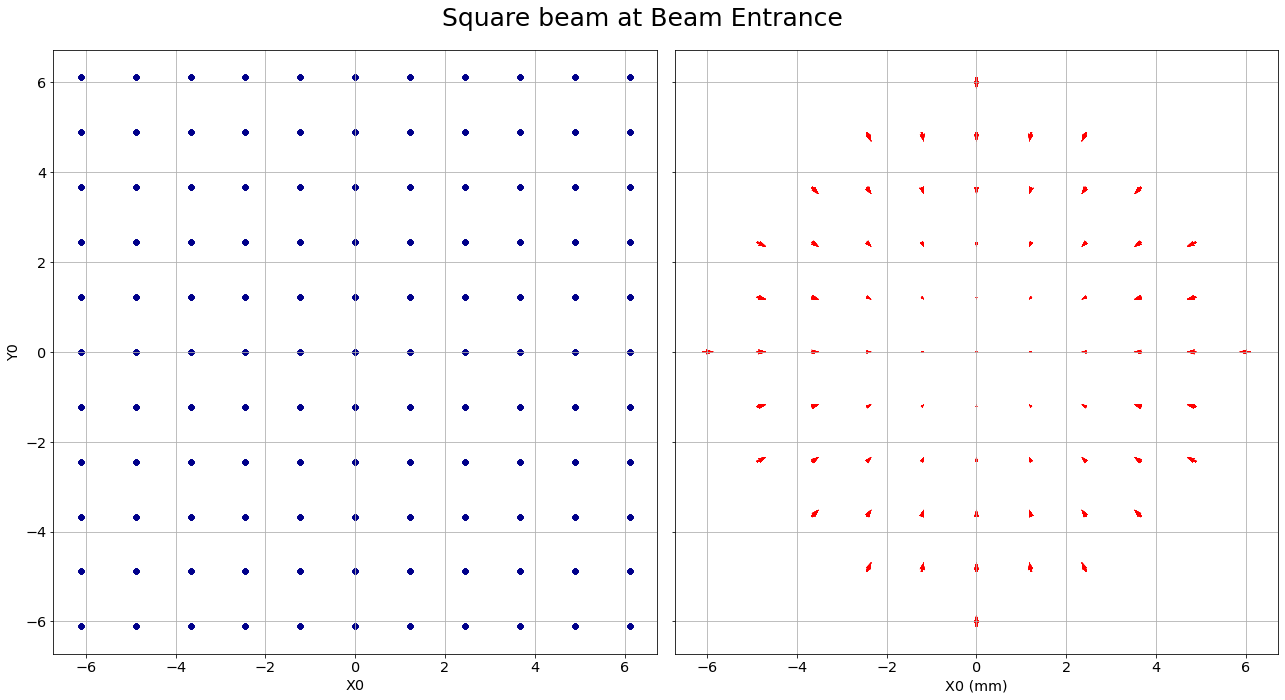

In [69]:
f, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(18,9),sharex=True,sharey=True)
df.plot.scatter(x="X0", y="Y0",c="DarkBlue",marker="o",ax=ax1)
ax1.set_aspect("equal")
ax1.grid()

q = ax2.quiver(X0,Y0, U0,V0,color="red")
ax2.set_aspect("equal")
ax2.set_xlabel("X0 (mm)")
ax2.grid()

plt.tight_layout()
plt.suptitle("Square beam at Beam Entrance",fontsize=25,Y=1.05)

In [58]:
wavemin=df["wave"].min()

In [59]:
df_sel=df[df["wave"]==wavemin]  # use df_sel because the file is truncated

In [60]:
X0C,Y0C,RMAX=GetBeamParam(df_sel)

In [61]:
X0C

0.0

In [62]:
Y0C

-5.872254014546283e-17

In [63]:
df_filter=df.loc[df.apply(Select_Beam, axis=1)]

In [64]:
X0=np.array(df_filter["X0"].values,dtype='float64')
Y0=np.array(df_filter["Y0"].values,dtype='float64')
V0=np.array(df_filter["V0"].values,dtype='float64')
U0=np.array(df_filter["U0"].values,dtype='float64')

Text(0.5, 0.98, 'Filtered circular beam')

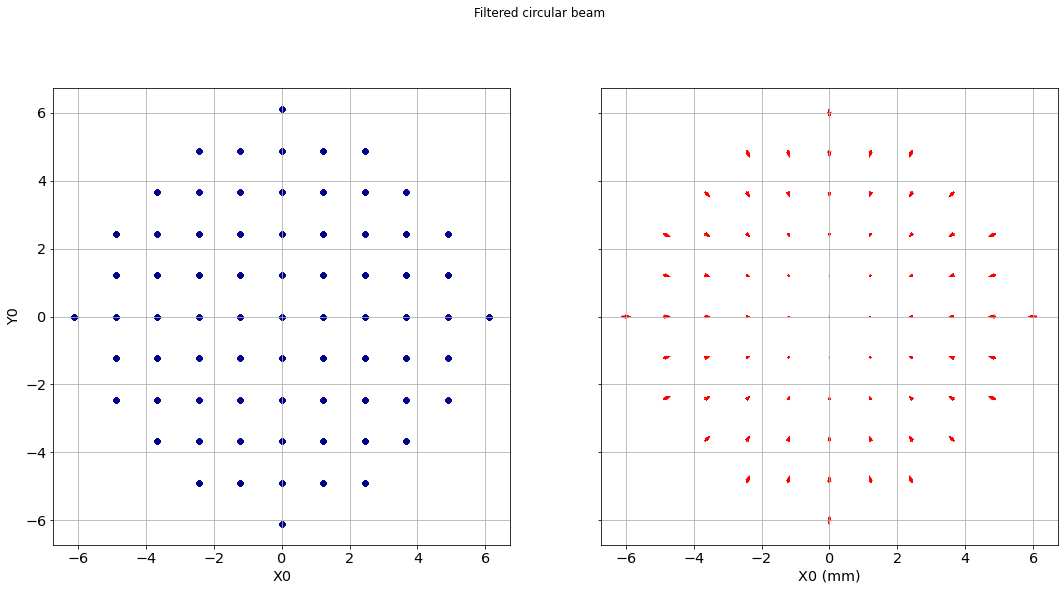

In [65]:
f, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(18,9),sharex=True,sharey=True)
df_filter.plot.scatter(x="X0", y="Y0",c="DarkBlue",marker="o",ax=ax1)
ax1.set_aspect("equal")
ax1.grid()

q = ax2.quiver(X0,Y0, U0,V0,color="red")
ax2.set_aspect("equal")
ax2.set_xlabel("X0 (mm)")
ax2.grid()

plt.suptitle("Filtered circular beam at Beam Entrance"fontsize=25)